## Importing Libraries

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Importing Data Sets

In [2]:
path=r'C:\Users\sasze\Documents\Careerfoundry Data Analytics\Achievement 4'

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust.pkl'))

In [4]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,product_name,department_id,...,frequency_flag,surname,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196.0,Soda,7.0,...,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,True,14084.0,Organic Unsweetened Vanilla Almond Milk,16.0,...,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,True,12427.0,Original Beef Jerky,19.0,...,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,True,26088.0,Aged White Cheddar Popcorn,19.0,...,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,True,26405.0,XL Pick-A-Size Paper Towel Rolls,17.0,...,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32641268 entries, 0 to 32641267
Data columns (total 29 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   first_order             bool    
 7   product_id              float64 
 8   product_name            category
 9   department_id           float64 
 10  prices                  float64 
 11  busiest day             category
 12  busiest days            category
 13  busiest_period_of_day   category
 14  max_order               int16   
 15  loyalty_flag            object  
 16  spending                float16 
 17  spending_flag           category
 18  frequency               uint16  
 19  frequency_flag          object  
 20  surname                 object  
 21  gender

## Bar Chart

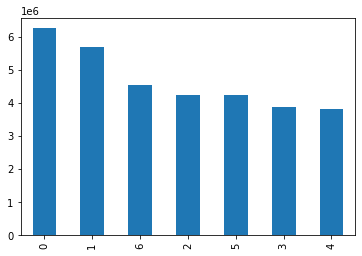

In [8]:
bar = df['orders_day_of_week'].value_counts().plot.bar()

## Histogram

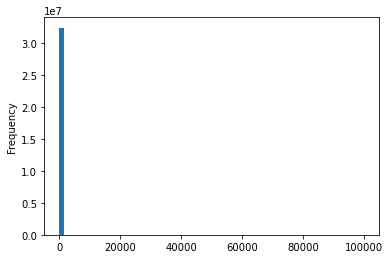

In [10]:
hist = df['prices'].plot.hist(bins = 70)

In the exercise, we saw that outliers (prices > 100) caused the one large column in the histogram. I will replace outlier values with nan

In [11]:
df.loc[df['prices'] > 100, 'prices'] = np.nan

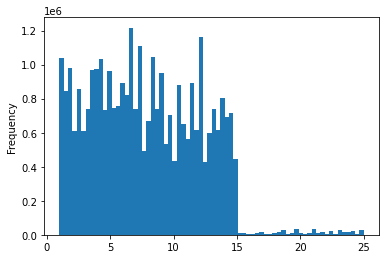

In [12]:
hist_2 = df['prices'].plot.hist(bins=70)

## Line Chart

In [13]:
#Take random Sample of 30% of data
np.random.seed(4)

In [14]:
dev = np.random.rand(len(df)) <= 0.7

In [15]:
#Split into two samples
big = df[dev]

In [16]:
small = df[~dev]

In [17]:
#Double check is big and small has all data
len(df)

32641268

In [18]:
len(big) + len(small)

32641268

In [20]:
df_2 = small[['orders_day_of_week', 'prices']]

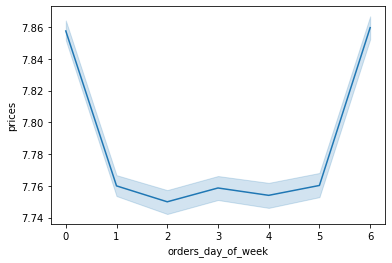

In [21]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

## Histogram of order_hour_of_the_day

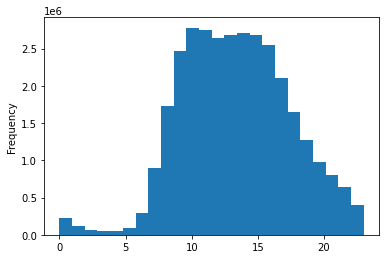

In [22]:
hist_3 = df['order_hour_of_day'].plot.hist(bins = 24)

This graph tells us that orders are mainly placed in the middle of the day.

## Bar Chart of Loyalty_flag

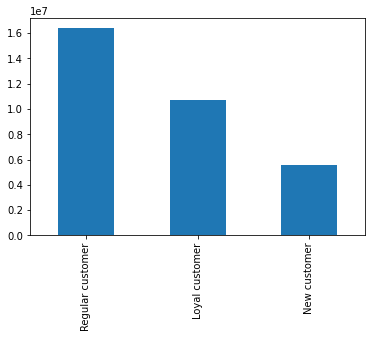

In [23]:
bar_2 = df['loyalty_flag'].value_counts().plot.bar()

## Line Chart prices, hour_of_day

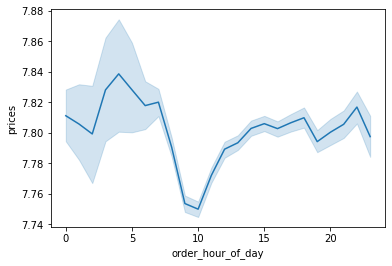

In [24]:
line_2 = sns.lineplot(data = df, x = 'order_hour_of_day', y = 'prices')

## Line Chart for age and N_dependents

In [25]:
df_3 = df[['age', 'n_dependants']]

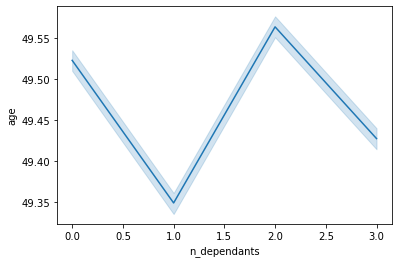

In [26]:
line_3 = sns.lineplot(data = df_3, x = 'n_dependants', y = 'age')

In [27]:
df['age'].mean()

49.4653546240912

The linechart shows the average number of dependents for customers who are the average age which is 49.47

## Scatterplot for age and income

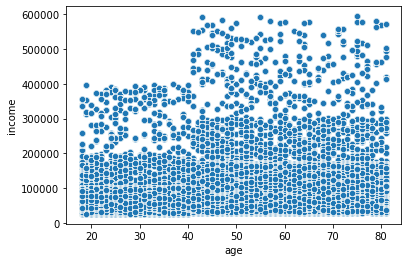

In [28]:
scatter = sns.scatterplot(data = df, x = 'age', y = 'income')

The scatterplot shows a slightly positive correlation between income (spending power) and age.

## Export Visualizations

In [29]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_day_of_week_bar.png'))

In [30]:
hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prices_hist.png'))

In [31]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'day_of_week_price_line.png'))

In [32]:
hist_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_hour_hist.png'))

In [33]:
bar_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_flag_bar.png'))

In [34]:
line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_hour_prices_line.png'))

In [35]:
line_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependants_age_line.png'))

In [36]:
scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_income.png'))